In [1]:
import pickle as pkl
from hc_lib.plots.figlib import FigureLibrary
import numpy as np
import seaborn as sbn
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt

/software/spack-software/2020.05.14/linux-rhel8-ivybridge/gcc-8.4.0/python-3.7.7-zgcjuclie3fiis4ljkrfp4c4j6fkoa62/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
base = '/lustre/cosinga/hcolor/output/'
path = base + 'lowgr_tng100B_099S_0A_800R/results/'
hisubfile = pkl.load(open(path + 'hisubhalogrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
hiptlfile = pkl.load(open(path + 'hiptlgrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))
vnfile = pkl.load(open(path + 'vngrid_tng100B_099S_0A_800R.pkl_rlib.pkl', 'rb'))

midpath = base + 'midgr_tng100B_099S_0A_1200R/results/'
midhisubfile = pkl.load(open(midpath + 'hisubhalogrid_tng100B_099S_0A_1200R.pkl_rlib.pkl', 'rb'))
midhiptlfile = pkl.load(open(midpath + 'hiptlgrid_tng100B_099S_0A_1200R.pkl_rlib.pkl', 'rb'))
midvnfile = pkl.load(open(midpath + 'vngrid_tng100B_099S_0A_1200R.pkl_rlib.pkl', 'rb'))

In [3]:
flib = FigureLibrary(hisubfile, 'pk')
flib.addResults(hiptlfile)
flib.addResults(vnfile)
flib.addResults(midhisubfile)
flib.addResults(midhiptlfile)
flib.addResults(midvnfile)

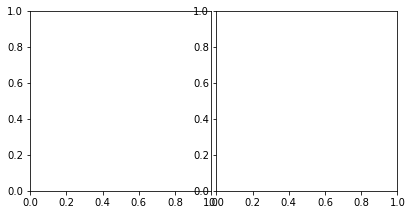

In [25]:
flib.createFigGrid(1, 2, panel_length = 2.5)
fig, panels = flib.getFig()

In [26]:
flib.getPropVals('grid_resolution')

[800, 1200]

# 800 Grid Resolution Plot

In [27]:
# get the desired power spectra
ip = {}
ip['grid_resolution'] = 800
ip['fieldname'] = ['hisubhalo', 'hiptl', 'vn']
ip['HI_res'] = 'diemer'
figarr = flib.arrangeResults(ip, 'snapshot', [99], 'space', ['real', 'redshift'], 'fieldname')

In [28]:
dim = flib.getDim()
for i in range(dim[0]):
    for j in range(dim[1]):
        idx = (i, j)
        flib.plotFill(idx, {'fieldname':'hisubhalo'}, 
                      fill_kwargs = {'color':'orange', 'label':'Galaxies'})
        
        flib.plotFill(idx, {'fieldname':'hiptl'}, 
                      fill_kwargs = {'color':'green', 'label':'Galaxy Particles'})
        flib.plotLine(idx, 'vn', 
                      line_kwargs = {'color':'purple', 'label':'Particles'})

In [29]:
# axes
flib.xLimAdjustToNyquist()
flib.flushYAxisToData()
flib.matchAxisLimits()
flib.logAxis()

# ticks
flib.removeDefaultTickLabels()
flib.changeTickParams()

# labels
colkw = {'fontsize':14, 'ha':'left', 'va':'bottom'}
legkw = {'fontsize':10}
# flib.colLabels(['Real Space', 'Redshift Space'])
flib.colLabels(['Real Space', 'Redshift Space'], pos = (0.05, 0.05), txt_kwargs = colkw)
flib.addLegend(kwargs = legkw)
flib.axisLabel('x')
flib.axisLabel('y', subscript = '\\rm{HI}', txt_kwargs = {'rotation':'vertical'})

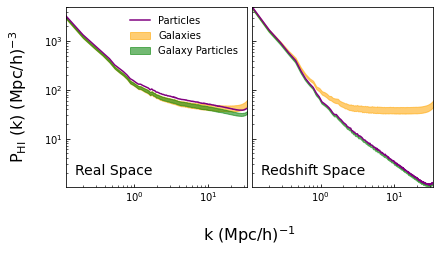

In [30]:
fig